In [1]:
pip install pandas matplotlib seaborn xgboost scikit-learn

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 640.0 kB/s eta 0:03:16
   ---------------------------------------- 0.1/124.9 MB 975.2 kB/s eta 0:02:09
   ---------------------------------------- 0.5/124.9 MB 3.9 MB/s eta 0:00:32
   ---------------------------------------- 1.1/124.9 MB 6.8 MB/s eta 0:00:19
    --------------------------------------- 1.6/124.9 MB 7.8 MB/s eta 0:00:16
    --------------------------------------- 1.9/124.9 MB 8.5 MB/s eta 0:00:15
    --------------------------------------- 2.5/124.9 MB 8.2 MB/s eta 0:00:15
    --------------------------------------- 3.0/124.9 MB 9.0 MB/s eta 0:00:14
   - -------------------------------------- 3.6/124.9 MB 9.3 MB/s eta 0:00:14
   - -------------------------------------- 4.3/124.9 MB 9.7 MB/s eta 0:00:13
   - -------------------------------------- 4.7/124.9 MB 10.0 MB/s eta 0:00:12
   - -------------------------------------- 5.3/124.9 MB 10.3 MB/s

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('airplane_price_dataset.csv')

In [7]:
# Display the first few rows of the dataset
df.head()

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


In [9]:
# Summary statistics
df.describe()

,Üretim Yılı,Motor Sayısı,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Fiyat ($)
count,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,1.237700e+04
mean,2001.477660,1.835259,190.413994,7782.210148,12.075615,2744.089599,21.522340,1.988336e+08
std,12.766785,0.370962,142.662710,5492.478746,9.905418,1293.209611,12.766785,2.290392e+08
min,1980.000000,1.000000,4.000000,1285.000000,2.000000,500.020000,0.000000,1.458148e+05
25%,1990.000000,2.000000,50.000000,3000.000000,5.950000,1627.260000,10.000000,1.409681e+07
50%,2001.000000,2.000000,162.000000,5700.000000,9.820000,2744.330000,22.000000,8.392191e+07
75%,2013.000000,2.000000,350.000000,14800.000000,13.470000,3848.840000,33.000000,3.843239e+08
max,2023.000000,2.000000,396.000000,15600.000000,49.970000,4999.660000,43.000000,9.782132e+08


In [11]:
# Check for missing values
df.isnull().sum()

Model                         0
Üretim Yılı                   0
Motor Sayısı                  0
Motor Türü                    0
Kapasite                      0
Menzil (km)                   0
Yakıt Tüketimi (L/saat)       0
Saatlik Bakım Maliyeti ($)    0
Yaş                           0
Satış Bölgesi                 0
Fiyat ($)                     0
dtype: int64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


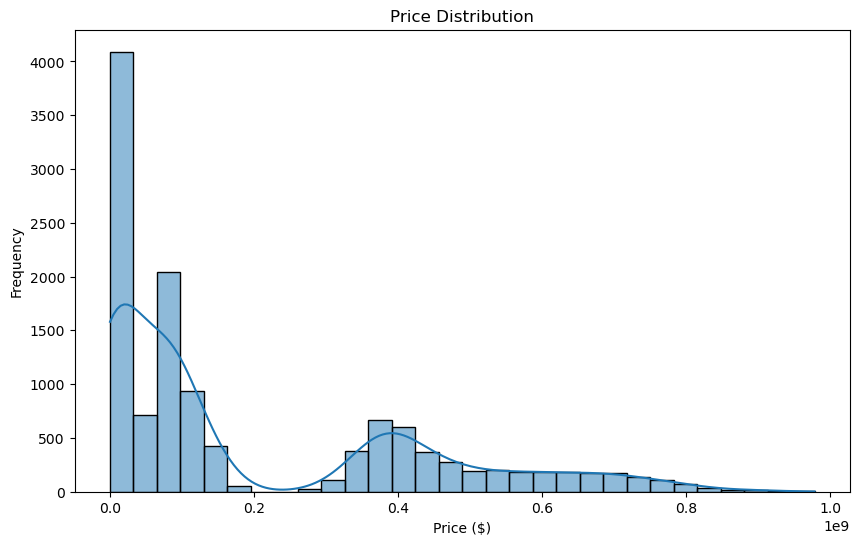

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fiyat ($)'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Fill or drop missing values if necessary
df.fillna(df.mean(), inplace=True)

# Split into features and target variable
X = df.drop('Fiyat ($)', axis=1)  # Features
y = df['Fiyat ($)']  # Target variable

## Train-Test Split

In [21]:
# Split the data into training and testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train Models
# Train Random Forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse:.2f}')

Random Forest MSE: 1093123967779579.00


In [25]:
# Train XGBoost models
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost MSE: {xgb_mse:.2f}')

XGBoost MSE: 1149079395085718.00


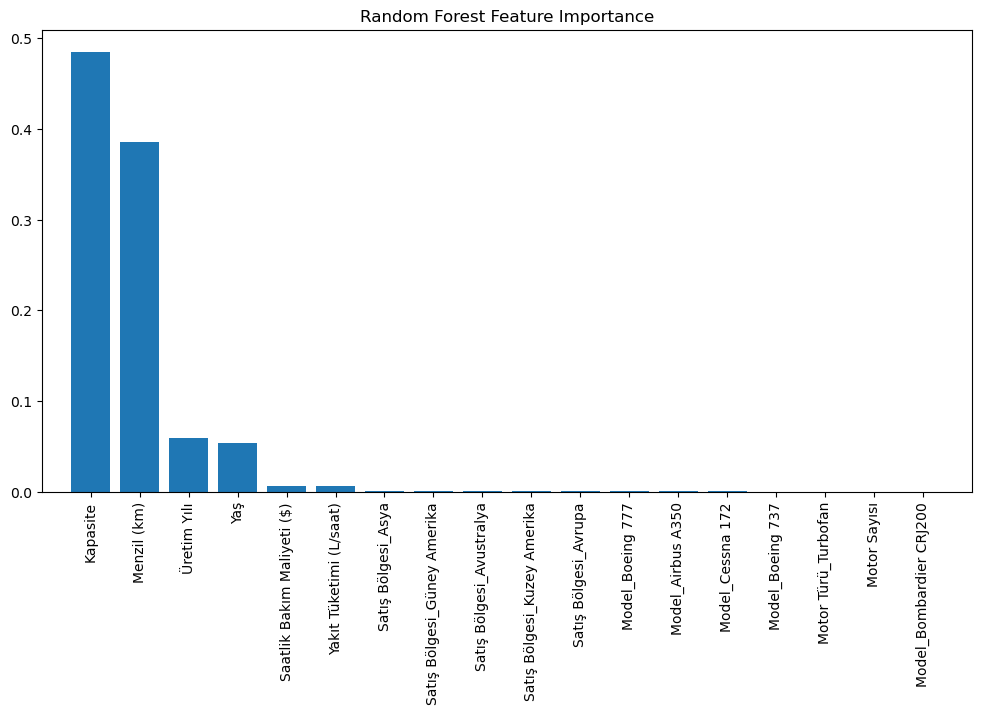

In [31]:
# Visualize the feature importance from the models
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Random Forest Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

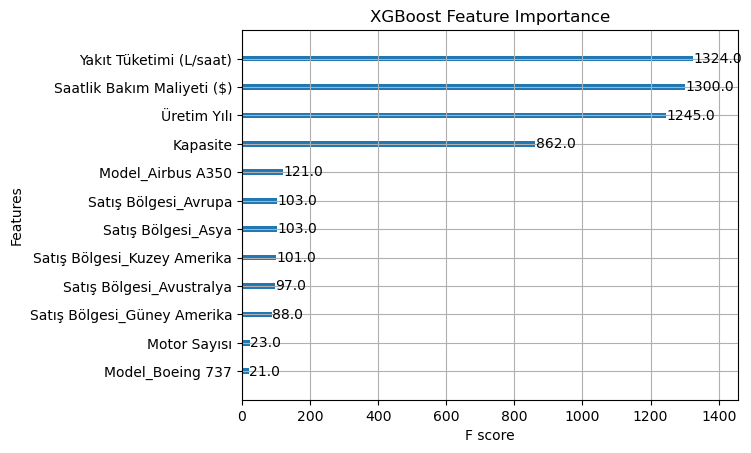

In [33]:
xgb.plot_importance(xgb_model)
plt.title('XGBoost Feature Importance')
plt.show()

## Make Predictions

In [37]:
# Predictions with Random Forest
rf_predictions = rf_model.predict(X_test)

# Print the first 10 predictions
print("Random Forest Predictions:")
print(rf_predictions[:10])

Random Forest Predictions:
[3.95686987e+05 1.16419524e+07 2.86265855e+05 1.11162590e+07
 7.85799950e+07 7.51632650e+08 6.02507236e+08 3.47315190e+08
 1.12312401e+08 2.17849485e+05]


In [39]:
# Predictions with XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Print the first 10 predictions
print("XGBoost Predictions:")
print(xgb_predictions[:10])

XGBoost Predictions:
[2.1010592e+06 1.5465801e+07 1.4658184e+05 1.5599480e+07 8.0614312e+07
 7.6150790e+08 6.4245197e+08 3.5542544e+08 1.1651965e+08 1.0988794e+05]


Evaluate Predictions

In [42]:
# Evaluate Random Forest
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest MSE: {rf_mse:.2f}')
print(f'Random Forest R^2: {rf_r2:.2f}')

Random Forest MSE: 1093123967779579.00
Random Forest R^2: 0.98


In [44]:
# Evaluate XGBoost
# Calculate MSE and R-squared for XGBoost
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f'XGBoost MSE: {xgb_mse:.2f}')
print(f'XGBoost R^2: {xgb_r2:.2f}')

XGBoost MSE: 1149079395085718.00
XGBoost R^2: 0.98


## Compare Predictions to Actual Values

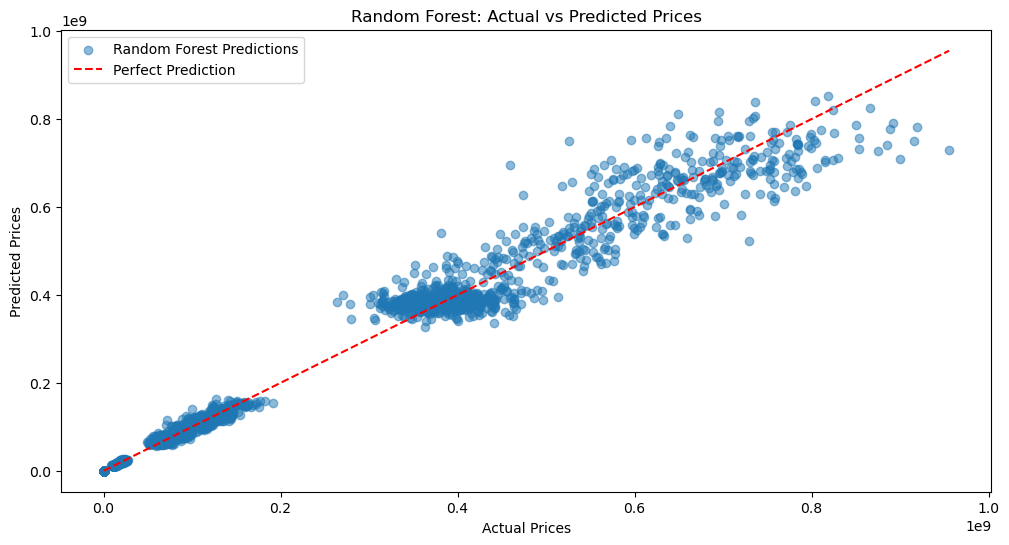

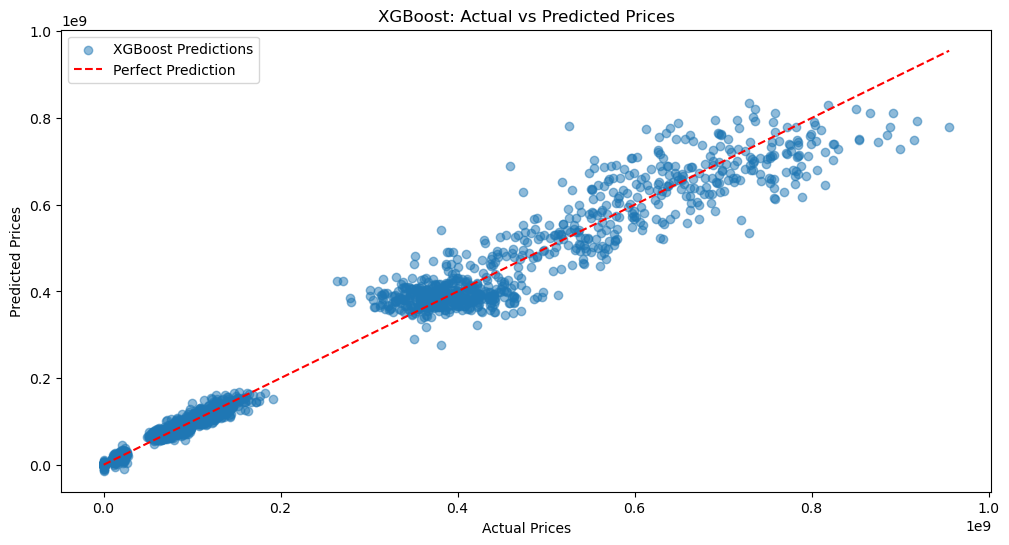

In [47]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# Plot actual vs predicted for XGBoost
plt.figure(figsize=(12, 6))
plt.scatter(y_test, xgb_predictions, alpha=0.5, label='XGBoost Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()